In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

covid=pd.read_csv('covid_19_india.csv')

In [2]:
print(covid.shape)

(2168, 9)


In [3]:
print(covid.columns)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


In [4]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


In [5]:
covid["State/UnionTerritory"].value_counts()

Kerala                              113
Telengana                            81
Delhi                                81
Rajasthan                            80
Uttar Pradesh                        79
Haryana                              79
Tamil Nadu                           76
Ladakh                               76
Karnataka                            74
Punjab                               74
Maharashtra                          74
Jammu and Kashmir                    74
Andhra Pradesh                       71
Uttarakhand                          68
Odisha                               67
Puducherry                           65
West Bengal                          65
Chandigarh                           64
Chhattisgarh                         64
Gujarat                              63
Madhya Pradesh                       62
Himachal Pradesh                     62
Bihar                                61
Manipur                              59
Mizoram                              58


In [6]:
import re
covid=covid.replace(to_replace='\#',value='', regex=True)
covid['State/UnionTerritory'].value_counts()

Kerala                              113
Telengana                            81
Delhi                                81
Rajasthan                            80
Haryana                              79
Uttar Pradesh                        79
Tamil Nadu                           76
Ladakh                               76
Maharashtra                          74
Karnataka                            74
Jammu and Kashmir                    74
Punjab                               74
Andhra Pradesh                       71
Uttarakhand                          68
Odisha                               67
West Bengal                          65
Puducherry                           65
Chandigarh                           64
Chhattisgarh                         64
Gujarat                              63
Madhya Pradesh                       62
Himachal Pradesh                     62
Bihar                                61
Manipur                              59
Mizoram                              58


In [34]:
import datetime as dt
from datetime import datetime

In [35]:
covid['Date']=pd.to_datetime(covid['Date'],dayfirst=True)

In [36]:
covid['Month_Num']=pd.DatetimeIndex(covid['Date']).month

In [37]:
covid['Month']=0
covid.loc[covid['Month_Num']==1,'Month']='Jan'
covid.loc[covid['Month_Num']==2,'Month']='Feb'
covid.loc[covid['Month_Num']==3,'Month']='Mar'
covid.loc[covid['Month_Num']==4,'Month']='April'
covid.loc[covid['Month_Num']==5,'Month']='May'

In [11]:
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       2
Deaths                      2
Confirmed                   0
Month_Num                   0
Month                       0
dtype: int64

In [12]:
covid_dict=covid['State/UnionTerritory'].value_counts().to_dict()
covid_dict

{'Kerala': 113,
 'Telengana': 81,
 'Delhi': 81,
 'Rajasthan': 80,
 'Haryana': 79,
 'Uttar Pradesh': 79,
 'Tamil Nadu': 76,
 'Ladakh': 76,
 'Maharashtra': 74,
 'Karnataka': 74,
 'Jammu and Kashmir': 74,
 'Punjab': 74,
 'Andhra Pradesh': 71,
 'Uttarakhand': 68,
 'Odisha': 67,
 'West Bengal': 65,
 'Puducherry': 65,
 'Chandigarh': 64,
 'Chhattisgarh': 64,
 'Gujarat': 63,
 'Madhya Pradesh': 62,
 'Himachal Pradesh': 62,
 'Bihar': 61,
 'Manipur': 59,
 'Mizoram': 58,
 'Goa': 57,
 'Andaman and Nicobar Islands': 57,
 'Jharkhand': 51,
 'Assam': 51,
 'Arunachal Pradesh': 49,
 'Tripura': 45,
 'Meghalaya': 38,
 'Dadar Nagar Haveli': 16,
 'Nagaland': 9,
 'Unassigned': 3,
 'Cases being reassigned to states': 2}

In [13]:
dict={}

for i in covid_dict:
    covid_loc=covid[covid['State/UnionTerritory'].str.contains(i)]
    dict.update({i:covid_loc["Confirmed"].max()})

In [14]:
dict

{'Kerala': 666,
 'Telengana': 1661,
 'Delhi': 11088,
 'Rajasthan': 6015,
 'Haryana': 993,
 'Uttar Pradesh': 5175,
 'Tamil Nadu': 13191,
 'Ladakh': 44,
 'Maharashtra': 39297,
 'Karnataka': 1462,
 'Jammu and Kashmir': 1390,
 'Punjab': 2005,
 'Andhra Pradesh': 2602,
 'Uttarakhand': 122,
 'Odisha': 1052,
 'West Bengal': 3103,
 'Puducherry': 18,
 'Chandigarh': 202,
 'Chhattisgarh': 115,
 'Gujarat': 12537,
 'Madhya Pradesh': 5735,
 'Himachal Pradesh': 110,
 'Bihar': 1674,
 'Manipur': 25,
 'Mizoram': 1,
 'Goa': 50,
 'Andaman and Nicobar Islands': 33,
 'Jharkhand': 231,
 'Assam': 170,
 'Arunachal Pradesh': 1,
 'Tripura': 173,
 'Meghalaya': 14,
 'Dadar Nagar Haveli': 1,
 'Nagaland': 1,
 'Unassigned': 77,
 'Cases being reassigned to states': 1403}

In [15]:
dict_keys=dict.keys()
print(dict_keys,'\n')

dict_values=dict.values()
print(dict_values)

dict_keys(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Maharashtra', 'Karnataka', 'Jammu and Kashmir', 'Punjab', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'West Bengal', 'Puducherry', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Madhya Pradesh', 'Himachal Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand', 'Assam', 'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Dadar Nagar Haveli', 'Nagaland', 'Unassigned', 'Cases being reassigned to states']) 

dict_values([666, 1661, 11088, 6015, 993, 5175, 13191, 44, 39297, 1462, 1390, 2005, 2602, 122, 1052, 3103, 18, 202, 115, 12537, 5735, 110, 1674, 25, 1, 50, 33, 231, 170, 1, 173, 14, 1, 1, 77, 1403])


Text(0, 0.5, 'Number of Cases')

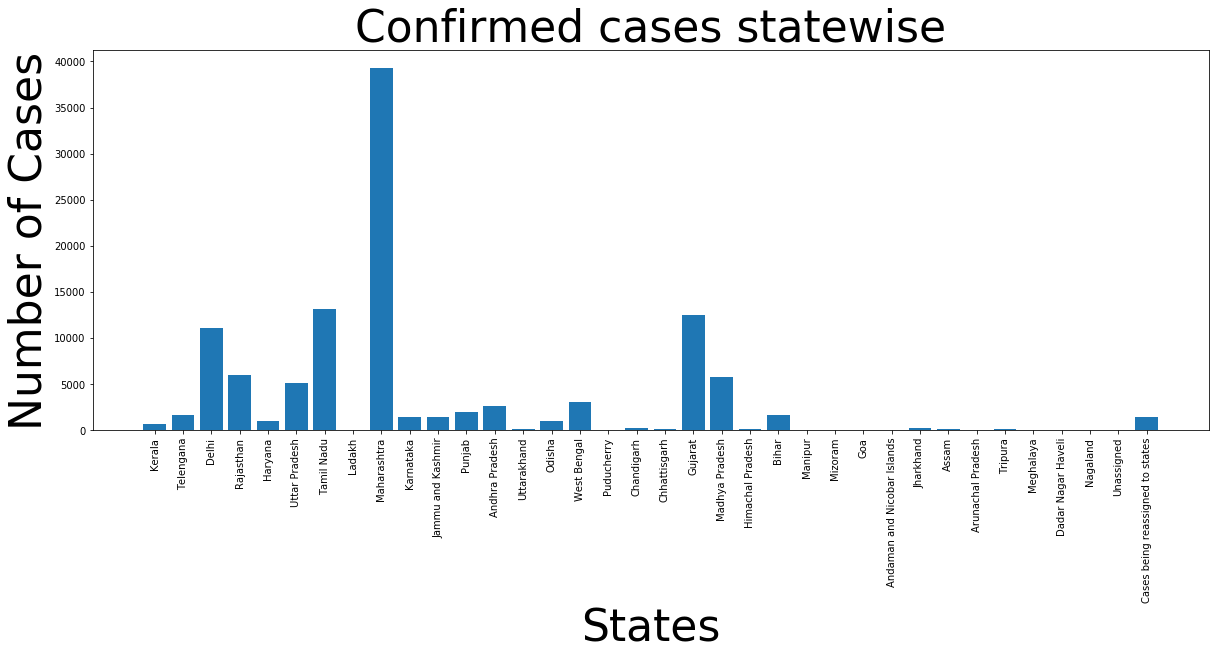

In [16]:
#covid.plot(kind='scatter',y='State/UnionTerritory',x='Confirmed');
#plt.show()

''' sns.FacetGrid(covid,hue="State/UnionTerritory",size=5) \
   .map(sns.distplot,"Confirmed")\
   .add_legend();
plt.show() '''
plt.figure(figsize=(20,7))
ax=plt.bar(dict_keys,dict_values)
plt.xticks(rotation=90)
plt.title('Confirmed cases statewise',fontsize=44)
plt.xlabel('States',fontsize=44)
plt.ylabel('Number of Cases',fontsize=44)

In [17]:
dict={}

for i in covid_dict:
    covid_loc=covid[covid['State/UnionTerritory'].str.contains(i)]
    dict.update({i:covid_loc["Deaths"].max()})

dict_keys=dict.keys()
print(dict_keys,'\n')

dict_values=dict.values()
print(dict_values)

dict_keys(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Maharashtra', 'Karnataka', 'Jammu and Kashmir', 'Punjab', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'West Bengal', 'Puducherry', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Madhya Pradesh', 'Himachal Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand', 'Assam', 'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Dadar Nagar Haveli', 'Nagaland', 'Unassigned', 'Cases being reassigned to states']) 

dict_values([4.0, 40.0, 176.0, 147.0, 14.0, 127.0, 87.0, 0.0, 1390.0, 41.0, 18.0, 38.0, 53.0, 1.0, 6.0, 253.0, 1.0, 3.0, 0.0, 749.0, 267.0, 3.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, nan])


Text(0, 0.5, 'Number of deaths')

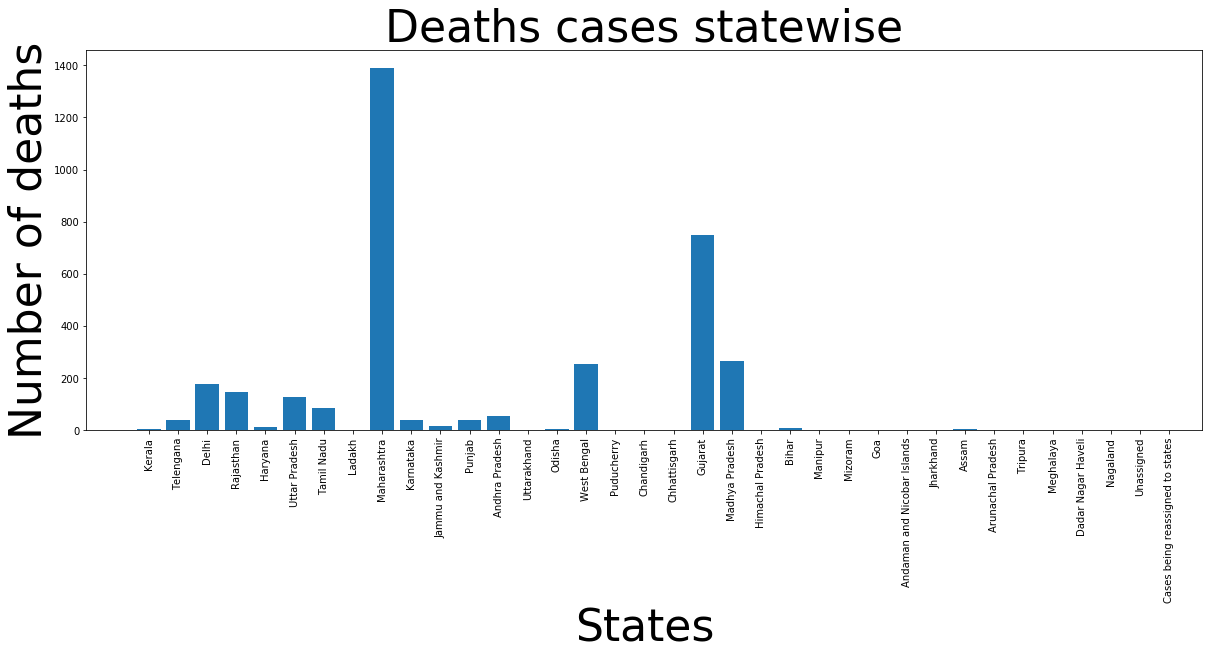

In [18]:
plt.figure(figsize=(20,7))
ax=plt.bar(dict_keys,dict_values)
plt.xticks(rotation=90)
plt.title('Deaths cases statewise',fontsize=44)
plt.xlabel('States',fontsize=44)
plt.ylabel('Number of deaths',fontsize=44)

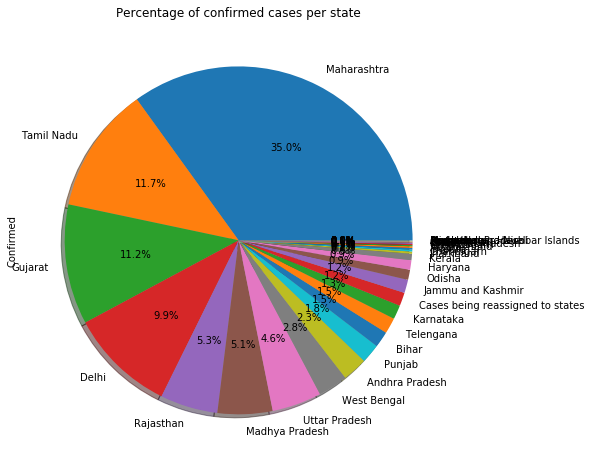

In [19]:
fig = plt.figure(figsize=(8,8))
conf_per_state = covid.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending=False)
#explode = conf_per_country
conf_per_state.plot(kind="pie",title='Percentage of confirmed cases per state',autopct='%1.1f%%', shadow= True)

In [20]:
data1=covid.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].max().sort_values('Confirmed',ascending=False)
data1=data1.reset_index()
data1

,State/UnionTerritory,Confirmed,Cured,Deaths
0,Maharashtra,39297,10318.0,1390.0
1,Tamil Nadu,13191,5882.0,87.0
2,Gujarat,12537,5219.0,749.0
3,Delhi,11088,5192.0,176.0
4,Rajasthan,6015,3404.0,147.0
5,Madhya Pradesh,5735,2733.0,267.0
6,Uttar Pradesh,5175,3066.0,127.0
7,West Bengal,3103,1136.0,253.0
8,Andhra Pradesh,2602,1640.0,53.0
9,Punjab,2005,1794.0,38.0


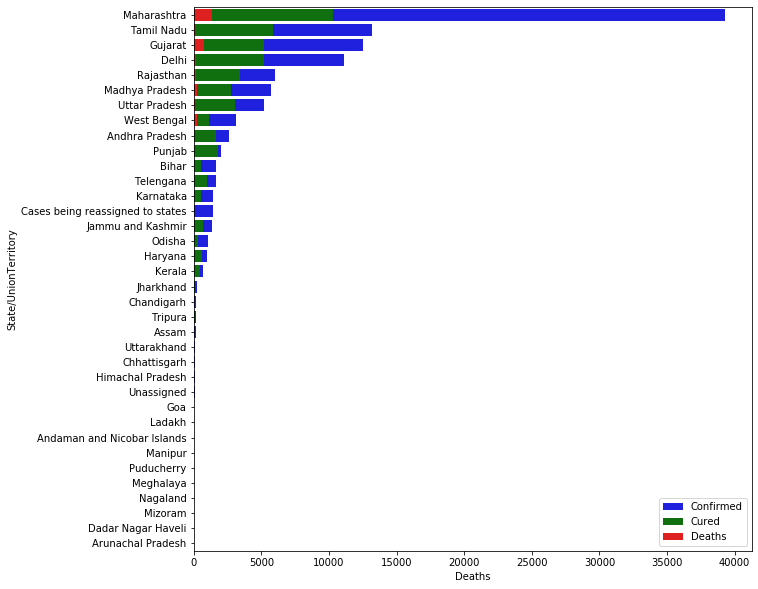

In [24]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))

bar1=sns.barplot(x='Confirmed', y='State/UnionTerritory', data=data1,
            label='Confirmed', color="b")


bar2=sns.barplot(x="Cured", y="State/UnionTerritory", data=data1,
            label="Cured", color="g")


bar3=sns.barplot(x="Deaths", y="State/UnionTerritory", data=data1,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.show()

In [26]:
data1["Recovery Rate"]=data1['Cured']/data1["Confirmed"]
data1['Death Rate']=data1['Deaths']/data1['Confirmed']
data1

,State/UnionTerritory,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
0,Maharashtra,39297,10318.0,1390.0,0.262565,0.035372
1,Tamil Nadu,13191,5882.0,87.0,0.445910,0.006595
2,Gujarat,12537,5219.0,749.0,0.416288,0.059743
3,Delhi,11088,5192.0,176.0,0.468254,0.015873
4,Rajasthan,6015,3404.0,147.0,0.565919,0.024439
5,Madhya Pradesh,5735,2733.0,267.0,0.476548,0.046556
6,Uttar Pradesh,5175,3066.0,127.0,0.592464,0.024541
7,West Bengal,3103,1136.0,253.0,0.366097,0.081534
8,Andhra Pradesh,2602,1640.0,53.0,0.630284,0.020369
9,Punjab,2005,1794.0,38.0,0.894763,0.018953


In [27]:
print('Recovery Rate=',data1['Recovery Rate'].mean()*100,"%")
print('Death Rate=',data1['Death Rate'].mean()*100,"%")

Recovery Rate= 50.0382304759462 %
Death Rate= 1.841867477876937 %


# Recovery and death rate graph of uttar pradesh

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


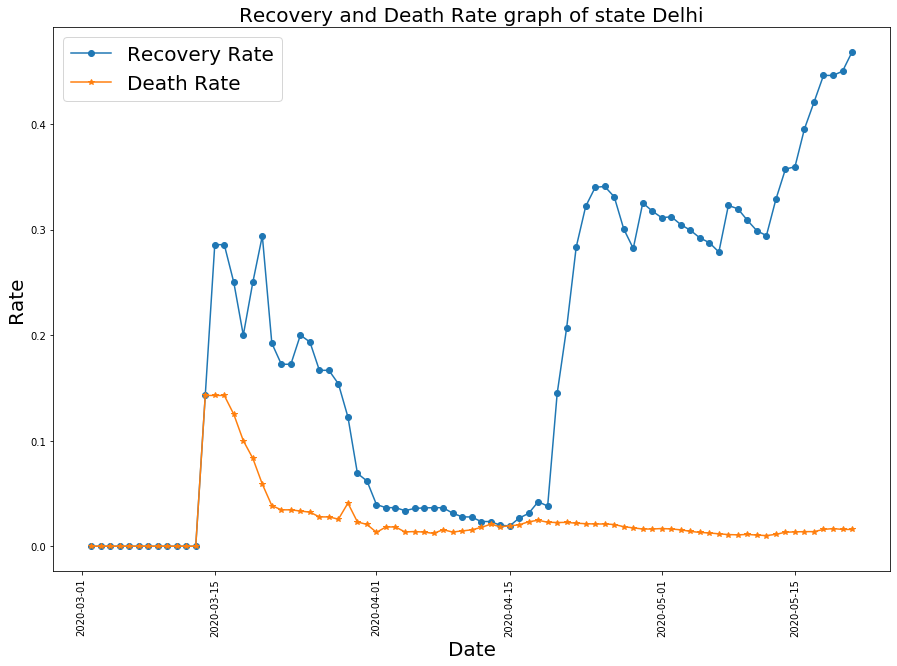

In [43]:
f,ax= plt.subplots(figsize=(15,10))
data_state=covid[covid['State/UnionTerritory'].str.contains('Delhi')]
data_state["Recovery Rate"]=data_state['Cured']/data_state["Confirmed"]
data_state['Death Rate']=data_state['Deaths']/data_state['Confirmed']
   
plt.plot(data_state['Date'],data_state['Recovery Rate'], marker='o',label="Recovery Rate")
plt.plot(data_state['Date'],data_state['Death Rate'], marker='*',label="Death Rate")

plt.ylabel('Rate',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(rotation=90)
plt.title('Recovery and Death Rate graph of state Delhi',fontsize=20)
ax.legend(loc='upper left',fontsize=20)

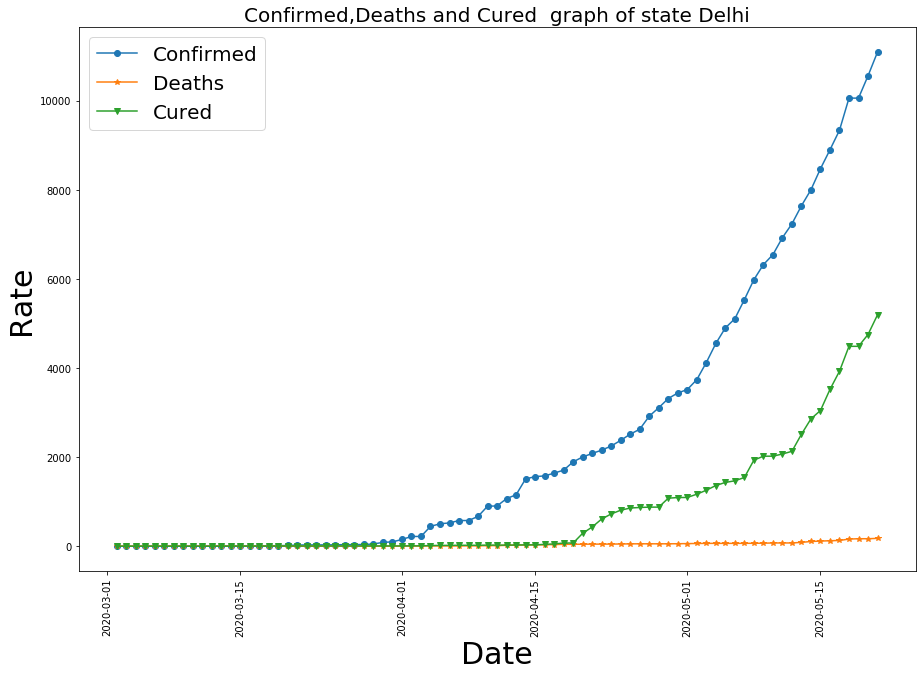

In [45]:
f,ax= plt.subplots(figsize=(15,10))

   
plt.plot(data_state['Date'],data_state['Confirmed'], marker='o',label="Confirmed")
plt.plot(data_state['Date'],data_state['Deaths'], marker='*',label="Deaths")
plt.plot(data_state['Date'],data_state['Cured'], marker='v',label="Cured")

plt.ylabel('Rate',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.title('Confirmed,Deaths and Cured graph of state Delhi',fontsize=20)
ax.legend(loc='upper left',fontsize=20)